<a href="https://colab.research.google.com/github/panagiotisl/ai-art-with-stable-diffusion/blob/main/2_Guidance_Scale_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers diffusers

#@title Login to HuggingFace 🤗

#@markdown You need to accept the model license before downloading or using the Stable Diffusion weights. Please, visit the [model card](https://huggingface.co/runwayml/stable-diffusion-v1-5), read the license and tick the checkbox if you agree. You have to be a registered user in 🤗 Hugging Face Hub, and you'll also need to use an access token for the code to work.
# https://huggingface.co/settings/tokens
!mkdir -p ~/.huggingface
HUGGINGFACE_TOKEN = "" #@param {type:"string"}
!echo -n "{HUGGINGFACE_TOKEN}" > ~/.huggingface/token

import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":16:8"

import torch
from diffusers import DDIMScheduler, StableDiffusionPipeline
from IPython.display import display
import numpy as np

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id).to("cuda")
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
g = torch.Generator(device="cuda")

torch.backends.cudnn.benchmark = False
torch.use_deterministic_algorithms(True)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.0/167.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.0 M

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please submit your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
For effortless bug reporting copy-paste your error into this form: https://docs.google.com/forms/d/e/1FAIpQLScPB8emS3Thkp66nvqwmjTEgxp8Y9ufuWTzFyr9kJ5AoI47dQ/viewform?usp=sf_link
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching /usr/local/cuda/lib64...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:105: UserWarning: /usr/lib64-nvidia did not contain libcudart.so as expected! Searching further paths...
  warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:27: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:27: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('8013'), PosixPath('http'), PosixPath('//172.28.0.1')}
  warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:27: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('--logtostderr --listen_host=172.28.0.12 --target_host=172.28.0.12 --tunnel_background_save_url=http

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


This example uses a seed, so different executions of the same prompt will generate the same picture.

  0%|          | 0/40 [00:00<?, ?it/s]

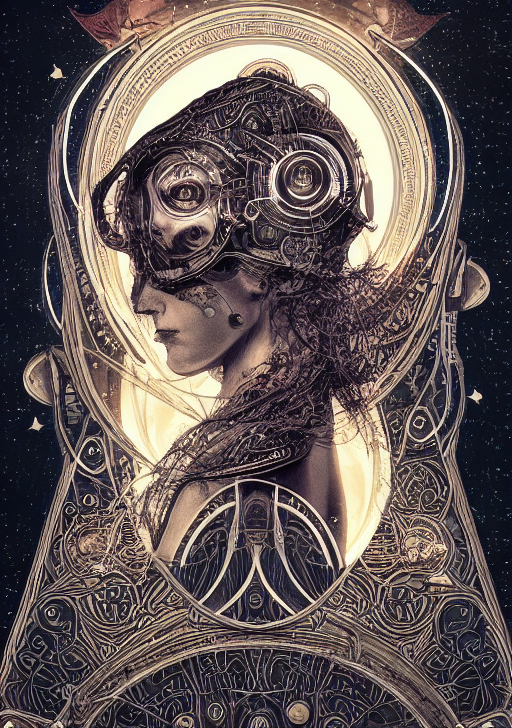

In [2]:
prompt = "tarot card with intricate detailed frame around the outside, side profile of cyberpunk head with large moon in background, cyberpunk, styled in Art Nouveau, insanely detailed, embellishments , high definition, concept art, digital art, vibrant"#@param {type:"string"}
negative_prompt = "bad quality, error, blurry, blurred, high contrast"
num_samples = 1
guidance_scale = 8
num_inference_steps = 40
height = 728
width = 512


g.manual_seed(36)
images = pipe(prompt=prompt,
               height = height,
               width = width,
               guidance_scale = guidance_scale,
               num_inference_steps=num_inference_steps,
               generator=g).images

for img in images:
    display(img)

We do not see a moon above, so below we increase the value of guidance_scale (from 8 to 11) to generate a similar image that follows more closely the text in the prompt.

  0%|          | 0/40 [00:00<?, ?it/s]

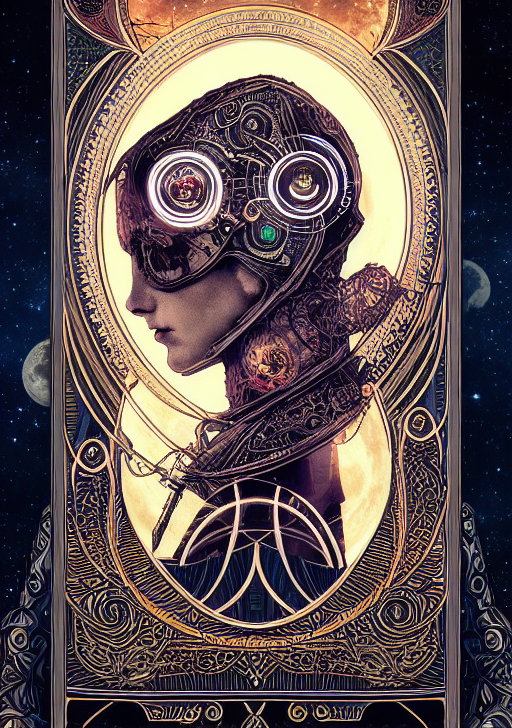

In [3]:
prompt = "tarot card with intricate detailed frame around the outside, side profile of cyberpunk head with large moon in background, cyberpunk, styled in Art Nouveau, insanely detailed, embellishments , high definition, concept art, digital art, vibrant"#@param {type:"string"}
negative_prompt = "bad quality, error, blurry, blurred, high contrast"
num_samples = 1
guidance_scale = 11
num_inference_steps = 40
height = 728
width = 512


g.manual_seed(36)
images = pipe(prompt=prompt,
               height = height,
               width = width,
               guidance_scale = guidance_scale,
               num_inference_steps=num_inference_steps,
               generator=g).images

for img in images:
    display(img)

We increase the value of guidance_scale further (from 11 to 12). We also use double parentheses to specify that it is important that a moon will appear in the generate image. A moon in the background is now more evident.


  0%|          | 0/40 [00:00<?, ?it/s]

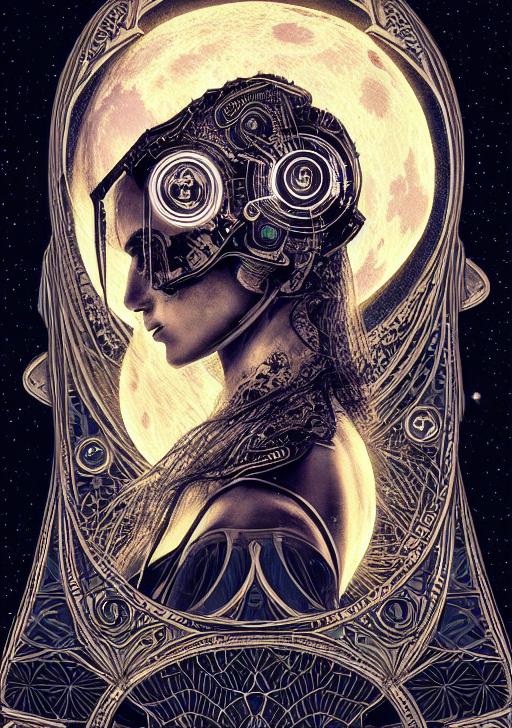

In [7]:
prompt = "tarot card with intricate detailed frame around the outside, side profile of cyberpunk head, ((large moon in background)), cyberpunk, styled in Art Nouveau, insanely detailed, embellishments , high definition, concept art, digital art, vibrant"#@param {type:"string"}
negative_prompt = "bad quality, error, blurry, blurred, high contrast"
num_samples = 1
guidance_scale = 12
num_inference_steps = 40
height = 728
width = 512


g.manual_seed(36)
images = pipe(prompt=prompt,
               height = height,
               width = width,
               guidance_scale = guidance_scale,
               num_inference_steps=num_inference_steps,
               generator=g).images

for img in images:
    display(img)

If we increase the guidance_scale value further the quality of the image will start to deteriorate.

  0%|          | 0/40 [00:00<?, ?it/s]

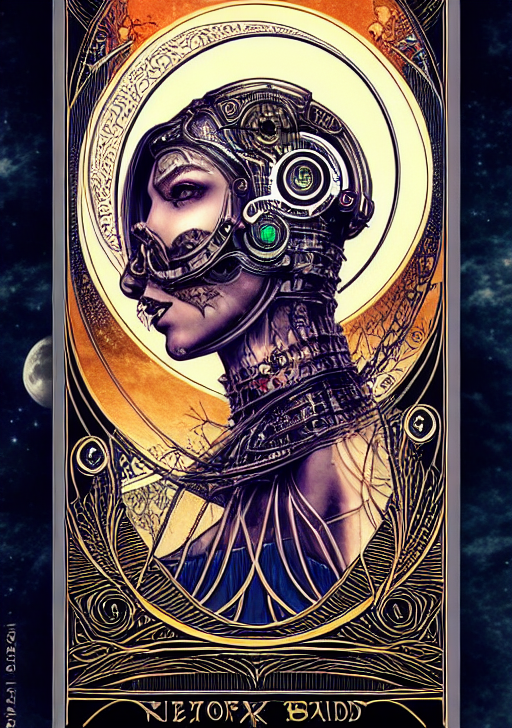

In [4]:
prompt = "tarot card with intricate detailed frame around the outside, side profile of cyberpunk head with large moon in background, cyberpunk, styled in Art Nouveau, insanely detailed, embellishments , high definition, concept art, digital art, vibrant"#@param {type:"string"}
negative_prompt = "bad quality, error, blurry, blurred, high contrast"
num_samples = 1
guidance_scale = 15
num_inference_steps = 40
height = 728
width = 512


g.manual_seed(36)
images = pipe(prompt=prompt,
               height = height,
               width = width,
               guidance_scale = guidance_scale,
               num_inference_steps=num_inference_steps,
               generator=g).images

for img in images:
    display(img)

And if we use extremely large values the quality will become even worse.

  0%|          | 0/40 [00:00<?, ?it/s]

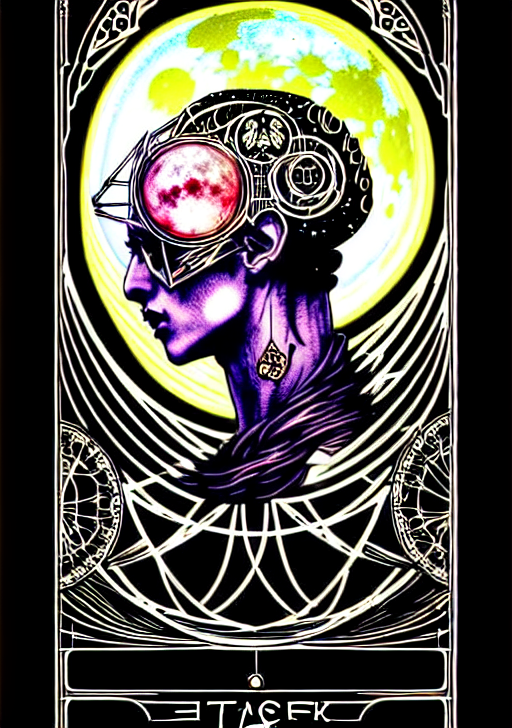

In [5]:
prompt = "tarot card with intricate detailed frame around the outside, side profile of cyberpunk head with large moon in background, cyberpunk, styled in Art Nouveau, insanely detailed, embellishments , high definition, concept art, digital art, vibrant"#@param {type:"string"}
negative_prompt = "bad quality, error, blurry, blurred, high contrast"
num_samples = 1
guidance_scale = 40
num_inference_steps = 40
height = 728
width = 512


g.manual_seed(36)
images = pipe(prompt=prompt,
               height = height,
               width = width,
               guidance_scale = guidance_scale,
               num_inference_steps=num_inference_steps,
               generator=g).images

for img in images:
    display(img)

If we decrease the value of guidance_scale the image will probably become more aesthetically pleasing, at the cost of many words in the prompt being completely ignored.

  0%|          | 0/40 [00:00<?, ?it/s]

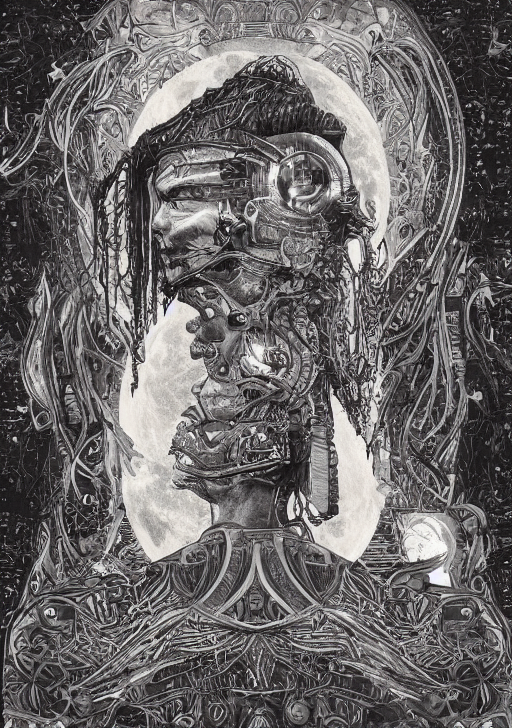

In [6]:
prompt = "tarot card with intricate detailed frame around the outside, side profile of cyberpunk head, ((large moon in background)), cyberpunk, styled in Art Nouveau, insanely detailed, embellishments , high definition, concept art, digital art, vibrant"#@param {type:"string"}
negative_prompt = "bad quality, error, blurry, blurred, high contrast"
num_samples = 1
guidance_scale = 3
num_inference_steps = 40
height = 728
width = 512


g.manual_seed(36)
images = pipe(prompt=prompt,
               height = height,
               width = width,
               guidance_scale = guidance_scale,
               num_inference_steps=num_inference_steps,
               generator=g).images

for img in images:
    display(img)